In [1]:
import requests
import json
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import string
import mysql.connector
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats
from spotipy.oauth2 import SpotifyClientCredentials

In [7]:
from spotipy.oauth2 import SpotifyClientCredentials 
client_id = "9f269f8ff86f432a96ab58abb33dd268"
client_secret = "e069c4ecb50c4ce097b0cb8974482432"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [20]:
#importing csv's from each database table

df_weekly = pd.read_csv('spotify_weekly.csv', sep = ';')
df_artists = pd.read_csv('artists.csv', sep = ';')
df_features = pd.read_csv('audio_features.csv', sep = ';')
df_albums = pd.read_csv('album_features.csv', sep = ';')
df_unique = pd.read_csv('weekly_features_pd.csv')

In [21]:
df_artists.head()


,id,name,popularity_score,num_of_followers
0,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,89,9617149
1,00me4Ke1LsvMxt5kydlMyU,Cosculluela,78,2827020
2,00XhexlJEXQstHimpZN910,Brytiago,85,2044398
3,02A3cEvlLLCbIMVDrK2GHV,Starley,67,77297
4,02kJSzxNuaWGqwubyUba0Z,G-Eazy,87,4219619


In [22]:
#rename columns to match with features df for successful merge
df_artists.rename(columns = {'name': 'artist'}, inplace = True)


In [23]:
#merge dataframes to match track features with track placement on charts

weekly_features = pd.merge(df_weekly, df_features, how = 'left', on = 'id')

In [24]:
weekly_features.sort_values('num_of_streams', ascending = False).head(10)


,id,week_of,chart_position,track_name,artist,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
10996,14msK75pk3pA33pzPVNtBF,55,1,7 rings,Ariana Grande,71467874,0.725,0.321,-10.744,0.323,0.578,0.000,0.088,0.319,70.142,178640,4.0
3600,0bAkKNCQfWkexHFn7fIKns,18,1,In My Feelings,Drake,67499798,0.735,0.482,-9.445,0.139,0.006,0.014,0.448,0.315,181.995,217933,4.0
8200,0TK2YIli7K1leLovkQiNik,41,1,Señorita,Shawn Mendes,67237638,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
18596,0TK2YIli7K1leLovkQiNik,93,1,Señorita,Shawn Mendes,66933317,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
9196,2G7V7zsVDxg1yRsu7Ew9RJ,46,1,In My Feelings,Drake,65825491,0.835,0.626,-5.833,0.125,0.059,0.000,0.396,0.350,91.030,217925,4.0
19396,0TK2YIli7K1leLovkQiNik,97,1,Señorita,Shawn Mendes,64942021,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
0,7qiZfU4dY1lWllzX7mPBI3,0,1,Shape of You,Ed Sheeran,64275251,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.0
16596,6ocbgoVGwYJhOv1GgI9NsF,83,1,7 rings,Ariana Grande,63197614,0.778,0.317,-10.732,0.334,0.592,0.000,0.088,0.327,140.048,178627,4.0
12796,0TK2YIli7K1leLovkQiNik,64,1,Señorita,Shawn Mendes,63045599,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
800,0TK2YIli7K1leLovkQiNik,4,1,Señorita,Shawn Mendes,61224745,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0


In [25]:
df_master = pd.merge(weekly_features, df_artists, how = 'left', on = 'artist')


In [26]:
df_master.sort_values('popularity_score', ascending = False).head()


,id_x,week_of,chart_position,track_name,artist,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,id_y,popularity_score,num_of_followers
20440,2C6WXnmZ66tHhHlnvwePiK,102,45,Die For Me (feat. Future & Halsey),Post Malone,10373799,0.614,0.660,-2.848,0.044,0.190,0.0,0.211,0.452,145.010,245267,4.0,246dkjvS1zLTtiykXe5h60,100.0,20854501.0
17596,7wGoVu4Dady5GV0Sv4UIsx,88,1,rockstar,Post Malone,29659184,0.577,0.522,-6.594,0.098,0.130,0.0,0.142,0.119,159.772,218320,4.0,246dkjvS1zLTtiykXe5h60,100.0,20854501.0
2485,5yuShbu70mtHXY0yLzCQLQ,12,86,Go Flex,Post Malone,5934885,0.665,0.498,-8.185,0.083,0.228,0.0,0.076,0.127,81.967,179613,4.0,246dkjvS1zLTtiykXe5h60,100.0,20854501.0
21433,7dt6x5M1jzdTEt8oCbisTK,107,38,Better Now,Post Malone,11775588,0.680,0.578,-5.804,0.040,0.331,0.0,0.135,0.341,145.038,231267,4.0,246dkjvS1zLTtiykXe5h60,100.0,20854501.0
10002,6MWtB6iiXyIwun0YzU6DFP,50,7,Wow.,Post Malone,22700765,0.833,0.539,-7.399,0.178,0.163,0.0,0.101,0.385,99.947,149520,4.0,246dkjvS1zLTtiykXe5h60,100.0,20854501.0


In [27]:
df_master['popularity_score']


0        98.0
1        98.0
2        89.0
3        98.0
4        91.0
         ... 
30990    91.0
30991    96.0
30992    77.0
30993    90.0
30994    90.0
Name: popularity_score, Length: 30995, dtype: float64

In [28]:
pop_score = df_master['popularity_score'].dropna()


In [29]:
acousticness = df_master['acousticness']


In [30]:
df_unique.head()


,Unnamed: 0,id,week_of,chart_position,track_name,artist,num_of_streams,num_times,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0,000xQL6tZNLJzIrtIgxqSl,36,57,Still Got Time,ZAYN,8368114,15,0.748,0.627,-6.029,0.064,0.131,0.0,0.085,0.524,120.963,188491,4.0
1,1,003eoIwxETJujVWmNFMoZy,11,155,Growing Pains,Alessia Cara,4358091,2,0.353,0.755,-6.276,0.733,0.082,0.0,0.390,0.437,191.153,193680,4.0
2,2,00B7TZ0Xawar6NZ00JFomN,87,140,Best Life (feat. Chance The Rapper),Cardi B,4743908,2,0.620,0.625,-7.438,0.553,0.287,0.0,0.314,0.665,167.911,284856,4.0
3,3,00EPIEnX1JFjff8sC6bccd,8,70,No Me Acuerdo,Thalía,7460620,16,0.836,0.799,-4.247,0.087,0.187,0.0,0.092,0.772,94.033,217653,4.0
4,4,00gpGR84M27moP7AFuqHIx,111,130,Bounce Out With That FT. YBN Nahmir,DJ A1,4913180,1,0.857,0.560,-8.278,0.173,0.043,0.0,0.153,0.482,94.949,91011,4.0


In [31]:
df_unique.sort_values('acousticness', ascending = False).head(10)


,Unnamed: 0,id,week_of,chart_position,track_name,artist,num_of_streams,num_times,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
1823,1823,4tHqQMWSqmL6YjXwsqthDI,16,123,Carol of the Bells,Mykola Dmytrovych Leontovych,7362398,6,0.418,0.106,-22.507,0.045,0.994,0.029,0.179,0.800,46.718,85267,4.0
322,322,0Uv5Kp8sEnriJjkX4oLfNI,8,127,Paul - Skit,Paul Rosenberg,5139520,2,0.636,0.335,-13.327,0.966,0.993,0.000,0.342,0.561,161.680,35240,4.0
1351,1351,3ITvHA9zhZZdBJsOsAUegF,2,116,Amorfoda,Bad Bunny,5573531,17,0.742,0.432,-7.539,0.062,0.984,0.000,0.080,0.252,148.005,155676,3.0
415,415,14JzyD6FlBD5z0wV5P07YI,5,51,when the party's over,Billie Eilish,9681823,23,0.498,0.104,-14.080,0.062,0.979,0.000,0.090,0.205,124.001,199931,3.0
842,842,299lFlaAsNQdgbIZNPmIA0,88,127,Christmas Time Is Here - Vocal,Vince Guaraldi Trio,5457722,1,0.388,0.145,-19.697,0.032,0.978,0.000,0.100,0.091,75.474,166387,3.0
1553,1553,43zdsphuZLzwA9k4DJhU0I,3,20,when the party's over,Billie Eilish,15201243,39,0.367,0.111,-14.084,0.097,0.978,0.000,0.090,0.198,82.642,196077,4.0
2353,2353,6B3zy3LOKHndqsviCr2z15,8,164,Em Calls Paul - Skit,Eminem,4351393,2,0.707,0.314,-10.115,0.747,0.977,0.000,0.109,0.602,104.014,49024,4.0
431,431,16x9bQHw8TBNaGDyULvwad,38,126,before I close my eyes,XXXTENTACION,5025420,1,0.356,0.143,-15.148,0.039,0.976,0.000,0.111,0.334,75.522,99658,4.0
1136,1136,2vQwlW8H1jFveGNXwZfJCV,135,129,Dead Inside (Interlude),XXXTENTACION,4496232,1,0.461,0.028,-21.992,0.041,0.973,0.002,0.169,0.354,88.388,86827,4.0
681,681,1SmiQ65iSAbPto6gPFlBYm,56,73,It’s Nice To Have A Friend,Taylor Swift,7780158,1,0.737,0.175,-9.912,0.040,0.971,0.000,0.171,0.545,70.008,150440,4.0


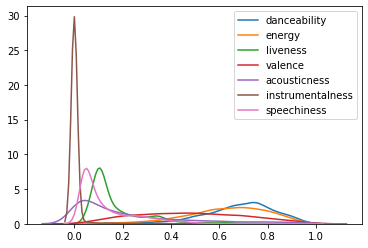

In [32]:
sns.kdeplot(df_unique['danceability'])
sns.kdeplot(df_unique['energy'])
sns.kdeplot(df_unique['liveness'])
sns.kdeplot(df_unique['valence'])
sns.kdeplot(df_unique['acousticness'])
sns.kdeplot(df_unique['instrumentalness'])
sns.kdeplot(df_unique['speechiness'])
plt.show()

In [33]:
top_ten = df_unique[df_unique['chart_position']<=10]


In [34]:
top_ten.sort_values('num_times', ascending = False).head(10)


,Unnamed: 0,id,week_of,chart_position,track_name,artist,num_of_streams,num_times,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
2954,2954,7qiZfU4dY1lWllzX7mPBI3,0,1,Shape of You,Ed Sheeran,64275251,153,0.825,0.652,-3.183,0.080,0.581,0.0,0.093,0.931,95.977,233713,4.0
297,297,0tgVpDi06FyKpA1z0VMD4v,0,7,Perfect,Ed Sheeran,24795623,144,0.599,0.448,-6.312,0.023,0.163,0.0,0.106,0.168,95.050,263400,3.0
2580,2580,6RUKPb4LETWmmr3iAEQktW,0,5,Something Just Like This,The Chainsmokers,30048981,125,0.617,0.635,-6.769,0.032,0.050,0.0,0.164,0.446,103.019,247160,4.0
1089,1089,2RttW7RAu5nOAfq6YFvApB,0,10,Happier,Ed Sheeran,23574465,89,0.522,0.385,-7.355,0.029,0.536,0.0,0.135,0.236,89.792,207520,4.0
2810,2810,7dt6x5M1jzdTEt8oCbisTK,2,2,Better Now,Post Malone,32111555,87,0.680,0.578,-5.804,0.040,0.331,0.0,0.135,0.341,145.038,231267,4.0
1953,1953,58q2HKrzhC3ozto2nDdN4z,2,10,I Like It,Cardi B,18878956,74,0.816,0.726,-3.998,0.129,0.099,0.0,0.372,0.650,136.048,253390,4.0
1452,1452,3swc6WTsr7rl9DqQKQA55C,2,7,Psycho (feat. Ty Dolla $ign),Post Malone,23868633,71,0.750,0.560,-8.094,0.105,0.546,0.0,0.111,0.459,140.060,221440,4.0
2815,2815,7ef4DlsgrMEH11cDZd32M6,2,3,One Kiss (with Dua Lipa),Calvin Harris,28915990,70,0.791,0.862,-3.240,0.110,0.037,0.0,0.081,0.592,123.994,214847,4.0
61,61,08bNPGLD8AhKpnnERrAc6G,2,8,FRIENDS,Marshmello,20990336,67,0.626,0.880,-2.384,0.050,0.205,0.0,0.128,0.534,95.079,202621,4.0
1391,1391,3NdDpSvN911VPGivFlV5d0,0,6,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,25353217,65,0.735,0.451,-8.374,0.059,0.063,0.0,0.325,0.086,117.973,245200,4.0


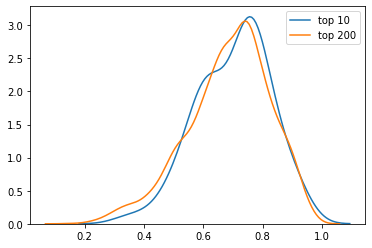

In [35]:
sns.kdeplot(top_ten['danceability'], label = 'top 10')
sns.kdeplot(df_unique['danceability'], label = 'top 200')
plt.show()

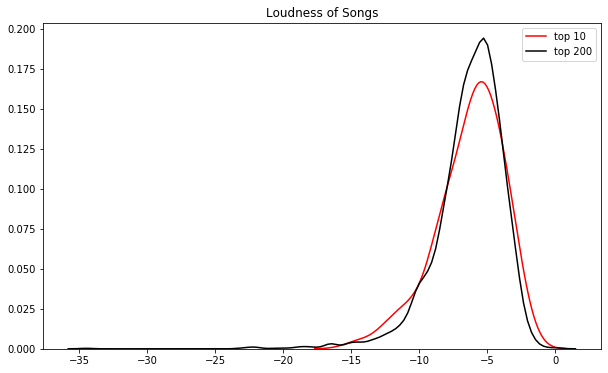

In [36]:
fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(top_ten['loudness'], label = 'top 10', color = 'red')
sns.kdeplot(df_unique['loudness'], label = 'top 200', color = 'black')
plt.title('Loudness of Songs')
plt.show()

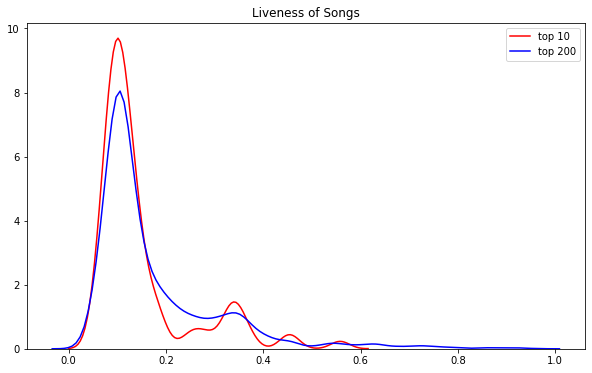

In [37]:
fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(top_ten['liveness'], label = 'top 10', color = 'red')
sns.kdeplot(df_unique['liveness'], label = 'top 200', color = 'blue')
plt.title('Liveness of Songs')
plt.show()

In [38]:
top_ten['liveness'].std(), df_unique['liveness'].std()


(0.10110372509350708, 0.13269716532580722)

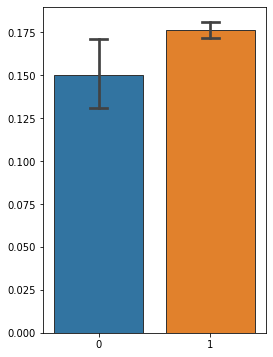

In [39]:
df_bar = [top_ten['liveness'], df_unique['liveness']]

fig, ax = plt.subplots(1,1,figsize=[4,6])
sns.barplot(data=df_bar, ax=ax,capsize=.15, lw=1, edgecolor=".2", ci=95) # SEM errorbars
plt.show()

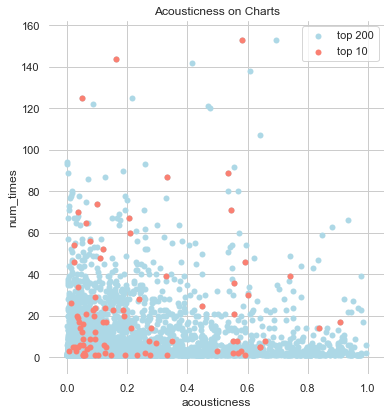

In [40]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_unique['acousticness'], y = df_unique['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue', label = 'top 200')
                    
sns.scatterplot(x= top_ten['acousticness'], y = top_ten['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'salmon', label = 'top 10')                    
plt.title('Acousticness on Charts')
plt.show()

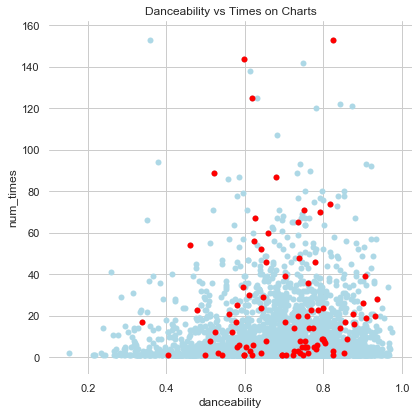

In [41]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_unique['danceability'], y = df_unique['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue')
                    
sns.scatterplot(x= top_ten['danceability'], y = top_ten['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'red')                    
plt.title('Danceability vs Times on Charts')
plt.show()

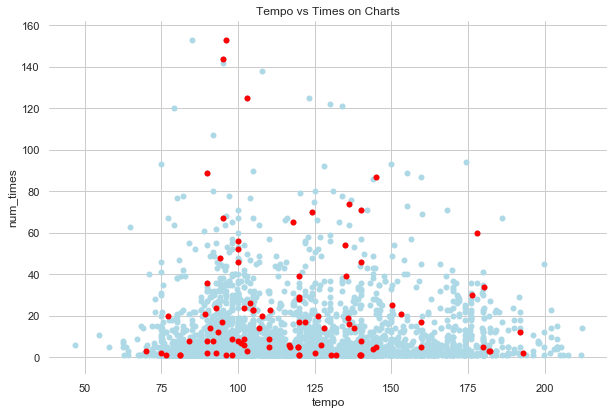

In [42]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_unique['tempo'], y = df_unique['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue')
                    
sns.scatterplot(x= top_ten['tempo'], y = top_ten['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'red')                    
plt.title('Tempo vs Times on Charts')
plt.show()

In [43]:
top_live_mean = top_ten['liveness'].mean()
top_live_mean

0.15037078651685398

## Hypothesis Testing

In [44]:
stats.ttest_1samp(top_ten['acousticness'], df_unique['acousticness'].mean())


Ttest_1sampResult(statistic=0.482601584482359, pvalue=0.6305769979326019)

## Modeling

In [50]:
from scipy.stats.stats import pearsonr
import scipy as sp
from scipy import stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
plt.style.use('seaborn')
from sklearn import metrics

In [78]:
df_master.columns

Index(['id_x', 'week_of', 'chart_position', 'track_name', 'artist',
       'num_of_streams', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'time_signature', 'id_y', 'popularity_score',
       'num_of_followers'],
      dtype='object')

#### OLS Model With Original Features From Data Set


In [86]:

mlr_model = ols(formula = "num_of_streams ~ 'id_x', 'week_of', 'chart_position', 'track_name', 'artist', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration', 'time_signature', 'id_y', 'popularity_score', 'num_of_followers'", data = df_master).fit()  #Without scaling the numbers
mlr_model.summary()  #output of all my features that wern't dropped that came with dataset

#created a new data frame with out the catergorical feature columns



PatsyError: Number of rows mismatch between data argument and 'id_x', 'week_of', 'chart_position', 'track_name', 'artist', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration', 'time_signature', 'id_y', 'popularity_score', 'num_of_followers' (30995 versus 19)
    num_of_streams ~ 'id_x', 'week_of', 'chart_position', 'track_name', 'artist', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration', 'time_signature', 'id_y', 'popularity_score', 'num_of_followers'
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [51]:
#Scaling the Model so the features are represented in standard deviations as opposed to it's normal numbers
scaler = StandardScaler()
scaler.fit(dfs)
df_scaled = scaler.transform(dfs)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = list(dfs.columns)

In [52]:
mlr_model = ols(formula = "num_of_streams ~ danceability + energy + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo", data = df_scaled).fit()
mlr_model.summary()  #SCALED & added my feature engineered column



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         num_of_streams   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     28.28
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.84e-49
Time:                        20:54:09   Log-Likelihood:                -43853.
No. Observations:               30995   AIC:                         8.773e+04
Df Residuals:                   30985   BIC:                         8.781e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          3.73e-17      0.006   6.59e-15      1.000      -0.011       0.011
danceability         0.0276      0.006      4.244      0.000       0.015       0.040
energy              -0.1030      0.010    -10.638      0.000      -0.122      -0.084
loudness             0.0917      0.009     10.243      0.000       0.074       0.109
speechiness         -0.0005      0.006     -0.084      0.933      -0.012       0.011
acousticness        -0.0085      0.007     -1.235      0.217      -0.022       0.005
instrumentalness     0.0138      0.006      2.401      0.016       0.003       0.025
liveness            -0.0219      0.006     -3.834      0.000      -0.033      -0.011
valence              0.0168      0.007      2.496      0.013       0.004       0.030
tempo               -0.0277      0.006     -4.713      0.000      -0.039      -0.016
==============================================================================
Omnibus:                    20128.266   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287409.008
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      16.695   Cond. No.                         3.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X = df_scaled.drop(["num_of_streams"], axis = 1)  
#checking to see if just scaling target changed model output


In [55]:
Y2 = dfs.num_of_streams  #checking to see if just scaling target changed model output


In [57]:
import statsmodels.api as sm  #scaled one 
from statsmodels.formula.api import ols
X_fit = sm.add_constant(X)
Y = dfs.num_of_streams.values.reshape(-1,1)   
lr_model = sm.OLS(Y, X_fit).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     28.28
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.84e-49
Time:                        20:56:43   Log-Likelihood:            -5.2611e+05
No. Observations:               30995   AIC:                         1.052e+06
Df Residuals:                   30985   BIC:                         1.052e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.036e+06   3.24e+04    248.395      0.000    7.97e+06     8.1e+06
danceability      1.576e+05   3.71e+04      4.244      0.000    8.48e+04     2.3e+05
energy           -5.889e+05   5.54e+04    -10.638      0.000   -6.97e+05    -4.8e+05
loudness          5.242e+05   5.12e+04     10.243      0.000    4.24e+05    6.25e+05
speechiness      -2900.2097   3.45e+04     -0.084      0.933   -7.06e+04    6.48e+04
acousticness     -4.852e+04   3.93e+04     -1.235      0.217   -1.26e+05    2.85e+04
instrumentalness  7.902e+04   3.29e+04      2.401      0.016    1.45e+04    1.44e+05
liveness          -1.25e+05   3.26e+04     -3.834      0.000   -1.89e+05   -6.11e+04
valence           9.615e+04   3.85e+04      2.496      0.013    2.07e+04    1.72e+05
tempo            -1.583e+05   3.36e+04     -4.713      0.000   -2.24e+05   -9.24e+04
==============================================================================
Omnibus:                    20128.266   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287409.008
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      16.695   Cond. No.                         3.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
from statsmodels.tools.eval_measures import rmse  #scaled target rmse (still needs to be scaled back)

# fit your model which you have already done

# now generate predictions
ypred = mlr_model.predict(X)

# calc rmse
rmse = rmse(df_scaled.num_of_streams, ypred)

print(rmse)

0.9959185020700687


In [60]:
from statsmodels.tools.eval_measures import rmse  #un-scaled target rmse (actual value)

# fit your model which you have already done

# now generate predictions
ypred2 = lr_model.predict(X_fit)

# calc rmse
rmse2 = rmse(Y2, ypred2)

print(rmse2)

5694942.408764713


In [61]:
df_master.columns


Index(['id_x', 'week_of', 'chart_position', 'track_name', 'artist',
       'num_of_streams', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'time_signature', 'id_y', 'popularity_score',
       'num_of_followers'],
      dtype='object')

In [64]:
dfN = df_master.drop(['id_x', 'week_of', 'chart_position', 'track_name', 'artist', 'duration', 'time_signature', 'id_y', 'popularity_score', 'num_of_followers'], axis =1)
#created a new data frame with out the catergorical feature columns

In [66]:
target = dfN.num_of_streams
features = dfN.drop(["num_of_streams"], axis = 1) #dropped price because that is the target variable

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, test_size = 0.2, random_state = 15)

In [69]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

#### Linear Model

In [71]:
from sklearn import metrics
import numpy as np
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)
print ("R^2 Score:", metrics.r2_score(y_train, (y_train_pred)))

Training Root Mean Squared Error: 5682150.780200136
R^2 Score: 0.008695434732670537


In [72]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 5746554.6289901305
Training:  5682150 vs. Testing:  5746554


In [73]:
sde = test_rmse / y_test.std()  #shows how many standard deviations the average error is away from the true value
sde

0.9970896671796976

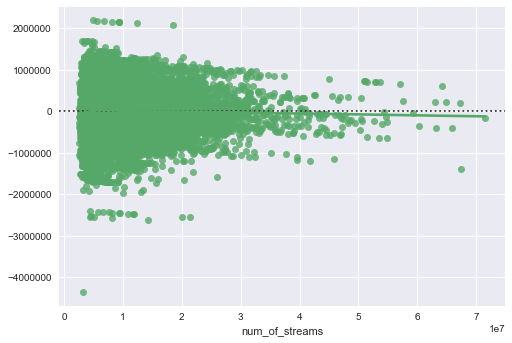

In [74]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")


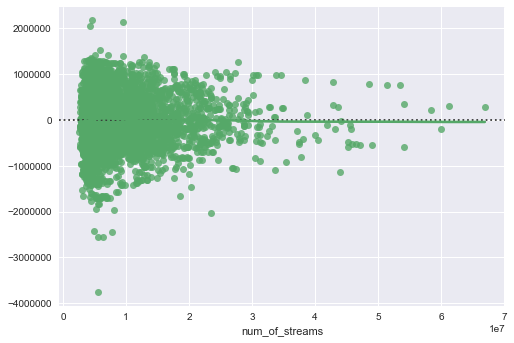

In [75]:
sns.residplot( y_test, y_pred,lowess=True, color="g")


In [76]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05, normalize = False)
lasso = lasso.fit(X_train, y_train)
y_train_pred2 = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print("Testing Rooot Mean Squared Error:" , test_rmse)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred2)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred))

Training Root Mean Squared Error: 5682150.780200136
Testing Rooot Mean Squared Error: 5746554.624754808
R^2 Train Score: 0.008695434732669094
R^2 Test Score: 0.0056517924540891995


In [77]:
sde = test_rmse / y_test.std()  #shows how many standard deviations the average error is away from the true value
sde

0.9970896664448231